# Otter Assign for Rmd Sample

In [1]:
library(datasets)
library(dplyr)
library(readr)
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Question 1:** Load the `iris` dataset. Use dplyr's `filter` function to create `setosas` as the subset of `iris` containing only setosas.

In [2]:
data(iris)                                        # SOLUTION
setosas <- iris %>% filter(Species == "setosa")   # SOLUTION

In [3]:
testthat::expect_equal(nrow(iris), 150)
testthat::expect_equal(length(names(iris)), 5)
for (col_name in c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")) {
  testthat::expect_true(col_name %in% names(iris))
}

In [4]:
testthat::expect_equal(nrow(setosas), 50)
testthat::expect_equal(length(unique(setosas$Species)), 1)

In [5]:
# HIDDEN
testthat::expect_equal(length(unique(iris$Species)), 3)
testthat::expect_equal(iris[1, "Sepal.Length"], 5.1)

**Question 2:** We are going to regress sepal length on sepal width and indicator variables for the iris species. Write down the regression equation for this model.

$$ y = \texttt{# YOUR MATH HERE} $$

$$ y = \beta_0 + \beta_1 \texttt{sepal_width} + \beta_2 \mathbb{1} \left \{ \texttt{species} = \text{setosa} \right \} +\beta_3 \mathbb{1} \left \{ \texttt{species} = \text{versicolor} \right \} $$

Any two of the possible species are OK as long as you used only two. (Adding a third would make our design matrix non-invertible.)

**Question 3:** Using the `iris` dataset, create two indicator variables for the iris species and then create a linear regression model regressing sepal length on sepal width and the species dummy variables.

In [6]:
# BEGIN SOLUTION
iris$setosa = iris$Species == "setosa"
iris$versicolor = iris$Species == "versicolor"
model = lm(Sepal.Length ~ Sepal.Width + setosa + versicolor, data=iris)
# END SOLUTION

In [7]:
testthat::expect_equal(length(names(iris)), 7)
for (col_name in c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")) {
  testthat::expect_true(col_name %in% names(iris))
}
testthat::expect_equal(length(names(iris)[names(iris) %in% iris$Species]), 2)

In [8]:
testthat::expect_equal(length(model$coefficients), 4)
testthat::expect_true("Sepal.Width" %in% names(model$coefficients))
testthat::expect_true("Sepal.Length" %in% colnames(model$model))
testthat::expect_false("Sepal.Length" %in% names(model$coefficients))

In [9]:
# HIDDEN
for (col_name in names(iris)) {
  if (!(col_name %in% c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species"))) {
    testthat::expect_equal(sum(iris[, col_name]), 50)
  }
}
if ("setosa" %in% names(iris)) {
  setosas = iris %>% filter(setosa == 1)
  testthat::expect_equal(mean(setosas$Petal.Length), 1.462)
}
if ("versicolor" %in% names(iris)) {
  versicolors = iris %>% filter(versicolor == 1)
  testthat::expect_equal(mean(versicolors$Petal.Length), 4.26)
}

**Question 4:** Use dplyr to load `data/galton.csv`. Create a linear regression model of child height on father and mother height.

In [10]:
# BEGIN SOLUTION
galton = read_csv("data/galton.csv")
model = lm(childHeight ~ mother + father, data=galton)
# END SOLUTION

Parsed with column specification:
cols(
  family = col_character(),
  father = col_double(),
  mother = col_double(),
  midparentHeight = col_double(),
  children = col_double(),
  childNum = col_double(),
  gender = col_character(),
  childHeight = col_double()
)



In [11]:
testthat::expect_equal(length(model$coefficients), 3)
testthat::expect_true("father" %in% names(model$coefficients))
testthat::expect_true("mother" %in% names(model$coefficients))

In [12]:
# HIDDEN
tol = 1e-5
actual_values = c(22.6432797, 0.3682823, 0.2905100)
coeffs = model$coefficients[c("(Intercept)", "father", "mother")]
for (i in 1:3) {
  testthat::expect_true(coeffs[i] > actual_values[i] - tol)
  testthat::expect_true(coeffs[i] < actual_values[i] + tol)
}

**Question 5:** Regress the child height on `midparentHeight` and plot the regression line and the data points.

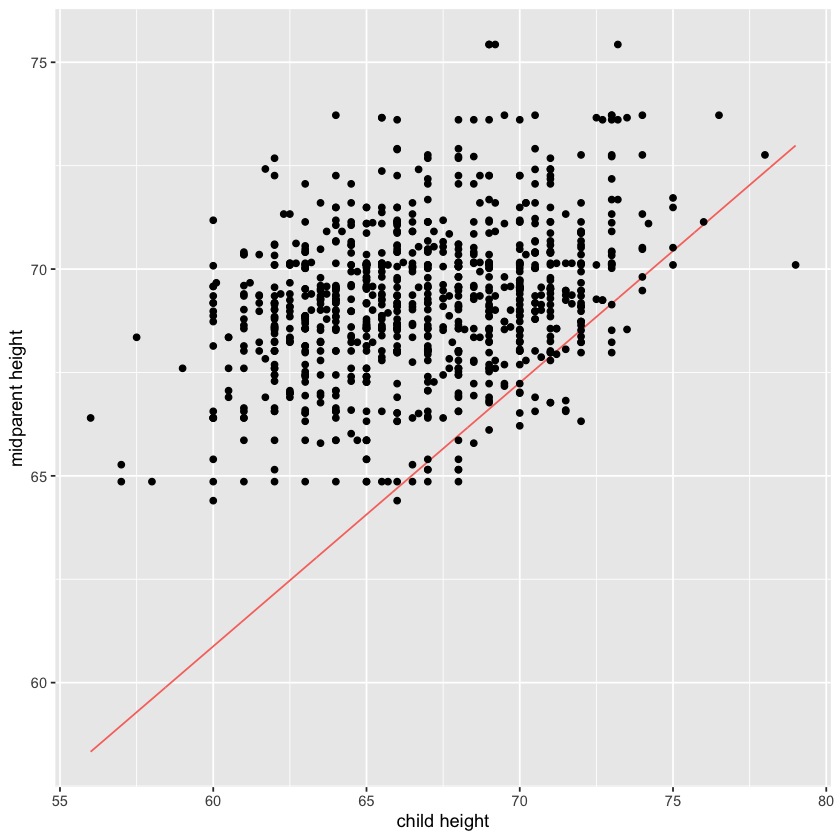

In [13]:
# BEGIN SOLUTION
model = lm(childHeight ~ midparentHeight, data=galton)

data_x = galton$childHeight
line_x = seq(min(data_x), max(data_x), length.out=length(data_x))

data_y = galton$midparentHeight
line_y = model$coefficients[[1]] + model$coefficients[[2]] * line_x

ggplot(data.frame(data_x, data_y, line_x, line_y), aes()) +
  geom_line(aes(x=line_x, y=line_y, color="red")) + 
  geom_point(aes(x=data_x, y=data_y)) +
  xlab("child height") +
  ylab("midparent height") +
  theme(legend.position = "none")
# END SOLUTION